In [188]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

tf.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism()

In [189]:
doe=pd.read_csv("D:\\wallpapers and photos\\3rd year\\Cleaned_DOE.csv")

In [190]:
doe

,Year,Sample Location,Temp,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%),month
0,2017,CUFL,22.2,8.10,20450.0,10414.0,10228.0,186,5.6,14.20,1
1,2017,TSP,22.2,7.90,19984.0,10190.0,9992.0,198,6.1,13.80,1
2,2017,CUFL,21.1,7.30,22580.0,11494.0,11292.0,202,4.8,14.80,2
3,2017,TSP,21.1,7.90,21356.0,10906.0,10678.0,228,5.4,13.60,2
4,2017,TSP,25.6,7.30,26330.0,13476.0,13168.0,308,6.1,17.20,3
...,...,...,...,...,...,...,...,...,...,...,...
144,2021,TSP,23.5,7.21,25790.0,13604.0,13450.0,154,5.1,13.60,3
145,2021,Shikalbaha,23.0,7.67,4340.0,2402.0,2360.0,42,6.6,2.40,3
146,2021,Kalurghat,23.5,7.32,293.0,201.0,167.0,34,7.1,0.16,3
147,2021,Mariam Nagar,22.0,7.43,257.0,190.0,148.0,42,5.9,0.14,3


In [191]:
doe["Date"]=pd.to_datetime(doe[["Year","month"]].assign(DAY=1))
doe2=doe.drop(["Year","month"],axis=1)
doe_ts=doe2[["Date","Salinity(%)"]]
doe_ts['Date'] = pd.to_datetime(doe_ts['Date'], format='%Y-%m')
doe_ts.index=doe_ts['Date']
del doe_ts['Date']
doe_ts

,Salinity(%)
Date,
2017-01-01,14.20
2017-01-01,13.80
2017-02-01,14.80
2017-02-01,13.60
2017-03-01,17.20
...,...
2021-03-01,13.60
2021-03-01,2.40
2021-03-01,0.16


Text(0.5, 1.0, 'How salinity changes with time')

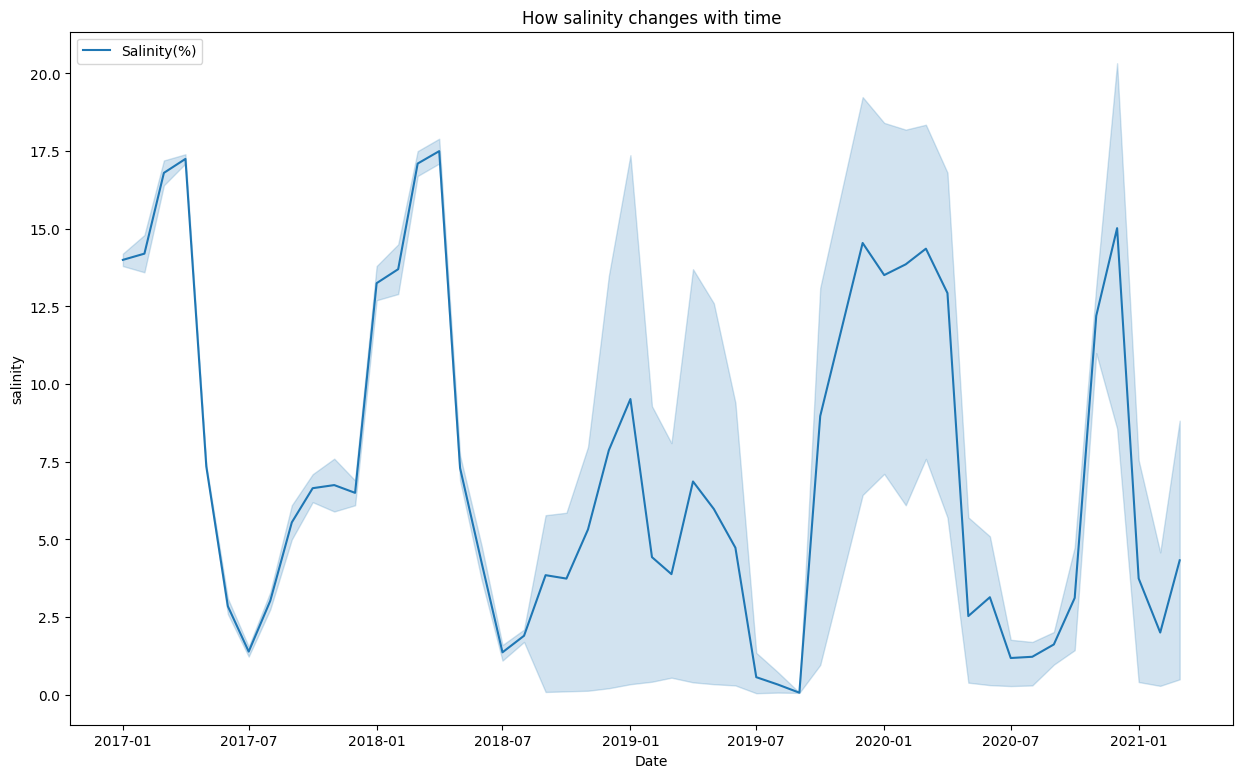

In [192]:
plt.figure(figsize=(15,9))
sns.lineplot(doe_ts)
plt.ylabel('salinity')
plt.xlabel('Date')
plt.title("How salinity changes with time")

In [193]:
df=doe.drop(["Year","month","Date"],axis=1)

In [194]:
train=df.drop(["Salinity(%)"],axis=1)
target=df[["Salinity(%)"]]
train,target

(    Sample Location  Temp    PH  EC(µS/cm)  TS(mg/l)  TDS(mg/l)  SS(mg/l)  \
 0              CUFL  22.2  8.10    20450.0   10414.0    10228.0       186   
 1               TSP  22.2  7.90    19984.0   10190.0     9992.0       198   
 2              CUFL  21.1  7.30    22580.0   11494.0    11292.0       202   
 3               TSP  21.1  7.90    21356.0   10906.0    10678.0       228   
 4               TSP  25.6  7.30    26330.0   13476.0    13168.0       308   
 ..              ...   ...   ...        ...       ...        ...       ...   
 144             TSP  23.5  7.21    25790.0   13604.0    13450.0       154   
 145      Shikalbaha  23.0  7.67     4340.0    2402.0     2360.0        42   
 146       Kalurghat  23.5  7.32      293.0     201.0      167.0        34   
 147    Mariam Nagar  22.0  7.43      257.0     190.0      148.0        42   
 148        KP Mills  22.5  7.26      147.0      79.0       69.0        10   
 
      DO(mg/l)  
 0         5.6  
 1         6.1  
 2         

In [195]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold,cross_val_score,RepeatedKFold
from sklearn.metrics import r2_score,mean_squared_error

In [196]:
scale=SklearnTransformerWrapper(transformer=StandardScaler())
encode=SklearnTransformerWrapper(transformer=OrdinalEncoder(),variables=["Sample Location"])
train_scale=scale.fit_transform(train)
train_encode=encode.fit_transform(train_scale)

In [197]:
train_encode

,Sample Location,Temp,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l)
0,0.0,-0.982094,1.246370,0.902116,0.672973,0.709125,-0.485413,-0.614185
1,8.0,-0.982094,0.777704,0.855808,0.633803,0.667736,-0.436492,-0.216265
2,0.0,-1.283302,-0.628296,1.113777,0.861826,0.895728,-0.420185,-1.250857
3,8.0,-1.283302,0.777704,0.992146,0.759006,0.788046,-0.314188,-0.773353
4,8.0,-0.051089,-0.628296,1.486420,1.208406,1.224739,0.011957,-0.216265
...,...,...,...,...,...,...,...,...
144,8.0,-0.626122,-0.839196,1.432759,1.230788,1.274196,-0.615871,-1.012105
145,7.0,-0.763034,0.238737,-0.698759,-0.728036,-0.670757,-1.072473,0.181654
146,5.0,-0.626122,-0.581430,-1.100916,-1.112911,-1.055363,-1.105088,0.579574
147,6.0,-1.036859,-0.323663,-1.104493,-1.114835,-1.058695,-1.072473,-0.375433


## Automated feature selection

In [198]:
knn=KNeighborsRegressor(n_neighbors=3)
feature=SklearnTransformerWrapper(transformer=SequentialFeatureSelector(knn,n_features_to_select="auto"))
train_feature=feature.fit_transform(train_encode,target)

In [199]:
train_feature

,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l)
0,0.902116,0.672973,0.709125,-0.614185
1,0.855808,0.633803,0.667736,-0.216265
2,1.113777,0.861826,0.895728,-1.250857
3,0.992146,0.759006,0.788046,-0.773353
4,1.486420,1.208406,1.224739,-0.216265
...,...,...,...,...
144,1.432759,1.230788,1.274196,-1.012105
145,-0.698759,-0.728036,-0.670757,0.181654
146,-1.100916,-1.112911,-1.055363,0.579574
147,-1.104493,-1.114835,-1.058695,-0.375433


In [200]:
lrn_rf=RandomForestRegressor(n_jobs=-1)
features2=SelectFromModel(estimator=lrn_rf)
#features2.fit_transform(train_encode,target)


In [201]:
train_feature2=train_encode[["EC(µS/cm)","TDS(mg/l)"]]
train_feature2


,EC(µS/cm),TDS(mg/l)
0,0.902116,0.709125
1,0.855808,0.667736
2,1.113777,0.895728
3,0.992146,0.788046
4,1.486420,1.224739
...,...,...
144,1.432759,1.274196
145,-0.698759,-0.670757
146,-1.100916,-1.055363
147,-1.104493,-1.058695


## Random Forest

In [16]:
lrn_rf=RandomForestRegressor(n_jobs=-1)

In [17]:
x_train1,x_test1,y_train1,y_test1=train_test_split(train_feature,target,test_size=0.3,random_state=4)
x_train2,x_test2,y_train2,y_test2=train_test_split(train_feature2,target,test_size=0.3,random_state=4)
model1=lrn_rf.fit(x_train1,y_train1)
pred1=model1.predict(x_test1)
r2_highfeature=r2_score(pred1,y_test1)
model2=lrn_rf.fit(x_train2,y_train2)
pred2=model1.predict(x_test2)
r2_lessfeature=r2_score(pred2,y_test2)
r2_highfeature,r2_lessfeature

(0.9650479911568233, 0.9656030177824464)

## GradientBoosting

In [18]:
lrn_xg=XGBRegressor(random_state=123,n_jobs=-1)

In [19]:
model_xg1=lrn_xg.fit(x_train1,y_train1)
pred_xg1=model_xg1.predict(x_test1)
r2_highfeature_xg=r2_score(pred_xg1,y_test1)
model_xg2=lrn_xg.fit(x_train2,y_train2)
pred_xg2=model_xg2.predict(x_test2)
r2_lessfeature_xg=r2_score(pred_xg2,y_test2)
r2_highfeature_xg,r2_lessfeature_xg

(0.9565794467926025, 0.9526466131210327)

## Adaboosting

In [20]:
lrn_ada=AdaBoostRegressor(random_state=123)

In [21]:
model_ada=lrn_ada.fit(x_train1,y_train1)
pred_ada=model_ada.predict(x_test1)
r2_highfeature_ada=r2_score(pred_ada,y_test1)
model_ada2=lrn_ada.fit(x_train2,y_train2)
pred_ada2=model_ada2.predict(x_test2)
r2_lessfeature_ada=r2_score(pred_ada2,y_test2)
r2_highfeature_ada,r2_lessfeature_ada

(0.9560703559706799, 0.9608018676684507)

## RandomForest hyperparameter tunning

In [22]:
ps_rf={
    'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    
    
}

rf=RandomizedSearchCV(estimator=lrn_rf,param_distributions=ps_rf,n_iter=300,cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),n_jobs=-1,scoring="neg_mean_absolute_error")
rf

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),
                   estimator=RandomForestRegressor(n_jobs=-1), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='neg_mean_absolute_error')

In [23]:
rf_model=rf.fit(train_feature,target)

In [24]:
rf_bestmodel=rf_model.best_estimator_

In [25]:
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [26]:
cv_rf=cross_val_score(rf_bestmodel,train_feature,target,n_jobs=-1,scoring="neg_mean_absolute_error",cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124))
mae=np.mean(cv_rf)*-1
## MAE is an error metric, i.e. the lower the better

In [27]:
cv_rf_rmse=cross_val_score(rf_bestmodel,train_feature,target,n_jobs=-1,scoring="neg_mean_squared_error",cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124))
rmse_scores =np.sqrt(-cv_rf_rmse)
rmse_scores

array([1.56605336, 1.08746048, 1.47437342, 1.12705868])

In [28]:
##the average rmse score from the cross validation
rmse=np.mean(rmse_scores)

In [29]:
#coefficient of determination
cv_rf_r2=cross_val_score(rf_bestmodel,train_feature,target,n_jobs=-1,scoring="r2",cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124))
r2=np.mean(cv_rf_r2)


In [30]:
from tabulate import tabulate
# Create a table
table = [
    ["Algorithm",  "Random Forest(CROSS VALIDATED)"],
    ["R-squared (R²)", r2],
    ["RMSE", rmse],
    ["MAE", mae]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════╤══════════════════════════════════╕
│ Algorithm      │   Random Forest(CROSS VALIDATED) │
╞════════════════╪══════════════════════════════════╡
│ R-squared (R²) │                         0.955169 │
├────────────────┼──────────────────────────────────┤
│ RMSE           │                         1.31374  │
├────────────────┼──────────────────────────────────┤
│ MAE            │                         0.857856 │
╘════════════════╧══════════════════════════════════╛


## Building a model from the Ground with the hyperparameter

In [31]:
randomForest=RandomForestRegressor(n_estimators=1200,min_samples_split= 2,min_samples_leaf= 1,max_features='sqrt',max_depth= 10,bootstrap=True,n_jobs=-1)

## Xgboost hyperparameter tunning

In [32]:
ps_xg= {
    'eta': np.arange(0.01,0.21,0.01),
    'min_child_weight': np.arange(2,7,1),
    'max_depth' : np.arange(3,11,1),
    'max_leaf_nodes': np.arange(1,10,1),
    'gamma': np.arange(0.01,1.01,0.05),
    'subsample': np.arange(0.5,1,0.1),
    'colsample_bytree': np.arange(0.5,1,0.1),
    'reg_lambda': np.arange(1e-5,1.5,0.1),
    'reg_alpha': np.arange(1e-5,1.5,0.1)
}

rs_xg=RandomizedSearchCV(estimator=lrn_xg,param_distributions=ps_xg,cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),n_jobs=-1,n_iter=400,scoring="neg_mean_absolute_error")


In [33]:
model_xg=rs_xg.fit(train_feature,target)

In [34]:
model_xg.best_params_

{'subsample': 0.7999999999999999,
 'reg_lambda': 1.00001,
 'reg_alpha': 1.2000100000000002,
 'min_child_weight': 2,
 'max_leaf_nodes': 7,
 'max_depth': 9,
 'gamma': 0.41000000000000003,
 'eta': 0.06999999999999999,
 'colsample_bytree': 0.7}

In [35]:
model_xg=model_xg.best_estimator_

In [36]:
cv_xg_mae=cross_val_score(model_xg,train_feature,target,cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),n_jobs=-1,scoring="neg_mean_absolute_error")
xg_mae=np.mean(cv_xg_mae)*-1
xg_mae

0.8759766950724361

In [37]:
cv_xg_rmse=cross_val_score(model_xg,train_feature,target,cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),n_jobs=-1,scoring="neg_mean_squared_error")
cv_xg_rmse=np.sqrt(-cv_xg_rmse)
xg_rmse=np.mean(cv_xg_rmse)
xg_rmse

1.3272922235780182

In [38]:
cv_xg_r2=cross_val_score(model_xg,train_feature,target,n_jobs=-1,scoring="r2",cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124))
xg_r2=np.mean(cv_xg_r2)
xg_r2

0.9549895226955414

In [39]:
table = [
    ["Algorithm",  "Xgboost(CROSS VALIDATED)"],
    ["R-squared (R²)", xg_r2],
    ["RMSE", xg_rmse],
    ["MAE", xg_mae]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════╤════════════════════════════╕
│ Algorithm      │   Xgboost(CROSS VALIDATED) │
╞════════════════╪════════════════════════════╡
│ R-squared (R²) │                   0.95499  │
├────────────────┼────────────────────────────┤
│ RMSE           │                   1.32729  │
├────────────────┼────────────────────────────┤
│ MAE            │                   0.875977 │
╘════════════════╧════════════════════════════╛


In [40]:
xgboost=XGBRegressor(subsample=0.8999999999999999,reg_lambda=1e-05,reg_alpha= 0.90001,min_child_weight=3,max_leaf_nodes=3,max_depth= 5,gamma= 0.36000000000000004,eta= 0.12,colsample_bytree=0.5,random_state=123)

## Adaboosting hyperparameter optimization

In [41]:
ps_ada= {
    #'estimator': [RandomForestRegressor(random_state=123,n_jobs=-1)],
    'n_estimators': np.arange(50,300,10),
    'learning_rate': np.arange(1e-5,1,0.01),
    
    
}

rs_ada=RandomizedSearchCV(estimator=lrn_ada,param_distributions=ps_ada,cv=RepeatedKFold(n_splits=5,n_repeats=2,random_state=123),scoring="neg_mean_absolute_error",n_jobs=-1,n_iter=100)

In [42]:
model_ada=rs_ada.fit(train_feature,target)


In [43]:
model_ada.best_params_

{'n_estimators': 60, 'learning_rate': 0.040010000000000004}

In [44]:
model_ada=model_ada.best_estimator_

In [45]:
cv_ada_mae=cross_val_score(model_ada,train_feature,target,cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),n_jobs=-1,scoring="neg_mean_absolute_error")
ada_mae=np.mean(cv_xg_mae)*-1
ada_mae

0.8759766950724361

In [46]:
cv_ada_rmse=cross_val_score(model_ada,train_feature,target,cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),n_jobs=-1,scoring="neg_mean_squared_error")
cv_ada_rmse=np.sqrt(-cv_ada_rmse)
ada_rmse=np.mean(cv_ada_rmse)
ada_rmse

1.382173701821042

In [47]:
cv_ada_r2=cross_val_score(model_ada,train_feature,target,n_jobs=-1,scoring="r2",cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124))
ada_r2=np.mean(cv_ada_r2)
ada_r2

0.950459203967271

In [48]:
table = [
    ["Algorithm",  "adaboost(CROSS VALIDATED)"],
    ["R-squared (R²)", ada_r2],
    ["RMSE", ada_rmse],
    ["MAE", ada_mae]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤═════════════════════════════╕
│ Algorithm      │   adaboost(CROSS VALIDATED) │
╞════════════════╪═════════════════════════════╡
│ R-squared (R²) │                    0.950459 │
├────────────────┼─────────────────────────────┤
│ RMSE           │                    1.38217  │
├────────────────┼─────────────────────────────┤
│ MAE            │                    0.875977 │
╘════════════════╧═════════════════════════════╛


In [49]:
adaboost=AdaBoostRegressor(n_estimators=60, learning_rate= 0.20001000000000002)

## model stacking

In [50]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LassoCV,RidgeCV
from sklearn.neighbors import KNeighborsRegressor

In [51]:
estimators = [
    #('Adaboosting', adaboost),
    ('Xgboost', xgboost),
    ('Randomforest', randomForest)
]
stack=StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV()
)

In [52]:
stack

StackingRegressor(estimators=[('Xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.12,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.36000000000000004,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_c...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaf_nodes=3, max_leaves=None,
                                            min_child_weight=3, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None, ...)),
                              ('Randomforest',
                               RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     n_estimators=1200,
                                                     n_jobs=-1))],
                  final_estimator=RidgeCV())

In [53]:
model_stack=stack.fit(train_feature,target)

In [54]:
cv_stack_rmse=cross_val_score(model_stack,train_feature,target,cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),n_jobs=-1,scoring="neg_mean_squared_error")
cv_stack_rmse=np.sqrt(-cv_stack_rmse)
stack_rmse=np.mean(cv_stack_rmse)
stack_rmse

1.3064698386680786

In [55]:
cv_stack_r2=cross_val_score(model_stack,train_feature,target,n_jobs=-1,scoring="r2",cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124))
stack_r2=np.mean(cv_stack_r2)
stack_r2

0.9561650799886732

In [56]:
cv_stack_mae=cross_val_score(model_stack,train_feature,target,cv=RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124),n_jobs=-1,scoring="neg_mean_absolute_error")
stack_mae=np.mean(cv_stack_mae)*-1
stack_mae

0.8631183341758051

In [57]:
table = [
    ["Algorithm",  "StackingModel(CROSS VALIDATED)"],
    ["R-squared (R²)", stack_r2],
    ["RMSE", stack_rmse],
    ["MAE", stack_mae]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤══════════════════════════════════╕
│ Algorithm      │   StackingModel(CROSS VALIDATED) │
╞════════════════╪══════════════════════════════════╡
│ R-squared (R²) │                         0.956165 │
├────────────────┼──────────────────────────────────┤
│ RMSE           │                         1.30647  │
├────────────────┼──────────────────────────────────┤
│ MAE            │                         0.863118 │
╘════════════════╧══════════════════════════════════╛


## Using ANN

In [226]:
from tensorflow.keras import layers,regularizers,metrics
import keras.backend as K

In [227]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

tf.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism()

## Train and test set

In [228]:
X_train, X_test, y_train, y_test=train_test_split(train_feature,target,test_size=0.4,random_state=1234)

In [229]:
X_train.shape,y_train.shape

((89, 4), (89, 1))

## Turning the test set into test and validation set

In [230]:
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=23)

In [231]:
X_val.shape,X_test.shape,y_val.shape,y_test.shape

((30, 4), (30, 4), (30, 1), (30, 1))

## Building the network using Functional API

In [232]:
input=keras.Input(shape=(X_train.shape[1],))
#1st input
feature=layers.Dense(32,kernel_regularizer=regularizers.l2(0.002),activation="relu")(input)


for shape in (32, 64, 128, 512):
    #residual connection with 1st input only,Help in training deeper networks by allowing gradients to flow through skip connections,and we use relu to introduce non-linearity in the model
    residual=layers.Dense(shape,kernel_regularizer=regularizers.l2(0.002),activation="relu")(feature)
    #primary building block
    feature=layers.Dense(shape,kernel_regularizer=regularizers.l2(0.002),activation="relu")(feature)
    feature=layers.Dropout(0.5)(feature)
    #add building block and residual connection
    feature=layers.add([feature,residual])

feature=layers.Activation(activation="relu")(feature)   
output=layers.Dense(1)(feature)
model=keras.Model(input,output)   

## Model Structure

In [233]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_60 (Dense)               (None, 32)           160         ['input_7[0][0]']                
                                                                                                  
 dense_62 (Dense)               (None, 32)           1056        ['dense_60[0][0]']               
                                                                                                  
 dropout_24 (Dropout)           (None, 32)           0           ['dense_62[0][0]']               
                                                                                            

In [234]:
def r2_keras(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [235]:
model.compile(optimizer="rmsprop",
             loss="mse",
             metrics=[keras.metrics.RootMeanSquaredError()])
#keras.metrics.RootMeanSquaredError()
#"mae"
#r2_keras

In [236]:
callback_mc_rmse=keras.callbacks.ModelCheckpoint("best_model.hs_rmse",save_best_only=True,monitor="val_loss")
callback_es=keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [237]:
history=model.fit(X_train,y_train,callbacks=[callback_mc_rmse,callback_es],validation_data=(X_val,y_val),epochs=1000,batch_size=50)

Epoch 1/1000
2/2 [==============================] - 3s 2s/step - loss: 75.0878 - root_mean_squared_error: 8.5808 - val_loss: 66.0327 - val_root_mean_squared_error: 8.0365
Epoch 2/1000
2/2 [==============================] - 2s 2s/step - loss: 48.5380 - root_mean_squared_error: 6.8624 - val_loss: 31.5441 - val_root_mean_squared_error: 5.4864
Epoch 3/1000
2/2 [==============================] - 2s 2s/step - loss: 29.3340 - root_mean_squared_error: 5.2812 - val_loss: 12.6116 - val_root_mean_squared_error: 3.3422
Epoch 4/1000
2/2 [==============================] - 0s 46ms/step - loss: 17.3785 - root_mean_squared_error: 3.9922 - val_loss: 18.1438 - val_root_mean_squared_error: 4.0874
Epoch 5/1000
2/2 [==============================] - 2s 2s/step - loss: 15.4832 - root_mean_squared_error: 3.7478 - val_loss: 10.4905 - val_root_mean_squared_error: 3.0092
Epoch 6/1000
2/2 [==============================] - 2s 2s/step - loss: 13.5214 - root_mean_squared_error: 3.4766 - val_loss: 9.6793 - val_root_

## Best model loading Rmse

In [238]:
best_model=keras.models.load_model("best_model.hs_rmse")




## Unseen data performance rmse

In [239]:
test_rmse_loss, test_rmse = best_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 158ms/step - loss: 1.7986 - root_mean_squared_error: 0.8370


## R2 score

In [240]:
model.compile(optimizer="rmsprop",
             loss="mse",
             metrics=[r2_keras])
callback_mc_r2=keras.callbacks.ModelCheckpoint("best_model.hs_r2",save_best_only=True,monitor="val_loss")
callback_es=keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [241]:
history2=model.fit(X_train,y_train,callbacks=[callback_mc_r2,callback_es],validation_data=(X_val,y_val),epochs=1000,batch_size=50)

Epoch 1/1000
2/2 [==============================] - 3s 2s/step - loss: 3.7939 - r2_keras: 0.9268 - val_loss: 18.5225 - val_r2_keras: 0.5332
Epoch 2/1000
2/2 [==============================] - 2s 2s/step - loss: 11.2921 - r2_keras: 0.7705 - val_loss: 3.1156 - val_r2_keras: 0.9427
Epoch 3/1000
2/2 [==============================] - 2s 2s/step - loss: 2.4301 - r2_keras: 0.9654 - val_loss: 2.7331 - val_r2_keras: 0.9527
Epoch 4/1000
2/2 [==============================] - 0s 36ms/step - loss: 2.3713 - r2_keras: 0.9644 - val_loss: 3.0568 - val_r2_keras: 0.9439
Epoch 5/1000
2/2 [==============================] - 2s 2s/step - loss: 2.3920 - r2_keras: 0.9654 - val_loss: 2.7233 - val_r2_keras: 0.9526
Epoch 6/1000
2/2 [==============================] - 2s 1s/step - loss: 2.0287 - r2_keras: 0.9738 - val_loss: 2.5723 - val_r2_keras: 0.9565
Epoch 7/1000
2/2 [==============================] - 0s 35ms/step - loss: 2.3561 - r2_keras: 0.9641 - val_loss: 2.6616 - val_r2_keras: 0.9539
Epoch 8/1000
2/2 [===

## Unseen data performance R2

In [242]:
best_model_r2 = keras.models.load_model('best_model.hs_r2', custom_objects={'r2_keras': r2_keras})
test_r2_loss, test_r2 = best_model_r2.evaluate(X_test, y_test)


1/1 [==============================] - 0s 161ms/step - loss: 1.6189 - r2_keras: 0.9809


## MAE

In [243]:
model.compile(optimizer="rmsprop",
             loss="mse",
             metrics=["mae"])
callback_mc_mae=keras.callbacks.ModelCheckpoint("best_model.hs_mae",save_best_only=True,monitor="val_loss")
callback_es=keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [244]:
history3=model.fit(X_train,y_train,callbacks=[callback_mc_mae,callback_es],validation_data=(X_val,y_val),epochs=1000,batch_size=50)

Epoch 1/1000
2/2 [==============================] - 3s 2s/step - loss: 6.3279 - mae: 1.6235 - val_loss: 3.2896 - val_mae: 1.0966
Epoch 2/1000
2/2 [==============================] - 2s 2s/step - loss: 2.0273 - mae: 0.7418 - val_loss: 3.2071 - val_mae: 1.1412
Epoch 3/1000
2/2 [==============================] - 0s 35ms/step - loss: 1.8249 - mae: 0.7256 - val_loss: 3.3698 - val_mae: 1.1079
Epoch 4/1000
2/2 [==============================] - 2s 2s/step - loss: 1.7272 - mae: 0.6904 - val_loss: 2.5887 - val_mae: 0.8445
Epoch 5/1000
2/2 [==============================] - 0s 32ms/step - loss: 1.8645 - mae: 0.6727 - val_loss: 2.6772 - val_mae: 0.9262
Epoch 6/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.8287 - mae: 0.6859 - val_loss: 3.5086 - val_mae: 1.1673
Epoch 7/1000
2/2 [==============================] - 0s 44ms/step - loss: 2.0048 - mae: 0.7895 - val_loss: 4.1424 - val_mae: 1.3538
Epoch 8/1000
2/2 [==============================] - 0s 51ms/step - loss: 3.1873 - mae: 1.

In [245]:
best_model_mae = keras.models.load_model('best_model.hs_mae')
test_mae_loss, test_mae = best_model_mae.evaluate(X_test, y_test)


1/1 [==============================] - 0s 172ms/step - loss: 1.2499 - mae: 0.5551


In [246]:
from tabulate import tabulate
table = [
    ["Algorithm",  "ANN"],
    ["R-squared (R²)", test_r2],
    ["RMSE", test_rmse],
    ["MAE", test_mae]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤══════════╕
│ Algorithm      │      ANN │
╞════════════════╪══════════╡
│ R-squared (R²) │ 0.980944 │
├────────────────┼──────────┤
│ RMSE           │ 0.837047 │
├────────────────┼──────────┤
│ MAE            │ 0.555141 │
╘════════════════╧══════════╛


## ploting


In [247]:
model.compile(optimizer="rmsprop",
             loss="mse",
             metrics=[keras.metrics.RootMeanSquaredError(),"mae",r2_keras])
callback_mc_rmse=keras.callbacks.ModelCheckpoint("best_model.hs",save_best_only=True,monitor="val_loss")
callback_es=keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history=model.fit(X_train,y_train,callbacks=[callback_mc_rmse,callback_es],validation_data=(X_val,y_val),epochs=1000,batch_size=50)

Epoch 1/1000
2/2 [==============================] - 3s 2s/step - loss: 10.8142 - root_mean_squared_error: 3.1864 - mae: 2.2408 - r2_keras: 0.7299 - val_loss: 3.5179 - val_root_mean_squared_error: 1.6922 - val_mae: 1.1943 - val_r2_keras: 0.9238
Epoch 2/1000
2/2 [==============================] - 2s 2s/step - loss: 2.1461 - root_mean_squared_error: 1.2215 - mae: 0.7511 - r2_keras: 0.9673 - val_loss: 2.3174 - val_root_mean_squared_error: 1.2906 - val_mae: 0.8333 - val_r2_keras: 0.9557
Epoch 3/1000
2/2 [==============================] - 2s 2s/step - loss: 1.2718 - root_mean_squared_error: 0.7877 - mae: 0.5472 - r2_keras: 0.9847 - val_loss: 2.3156 - val_root_mean_squared_error: 1.2909 - val_mae: 0.8168 - val_r2_keras: 0.9557
Epoch 4/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.3167 - root_mean_squared_error: 0.8173 - mae: 0.5767 - r2_keras: 0.9836 - val_loss: 2.3159 - val_root_mean_squared_error: 1.2919 - val_mae: 0.8065 - val_r2_keras: 0.9556
Epoch 5/1000
2/2 [=======

<Axes: >

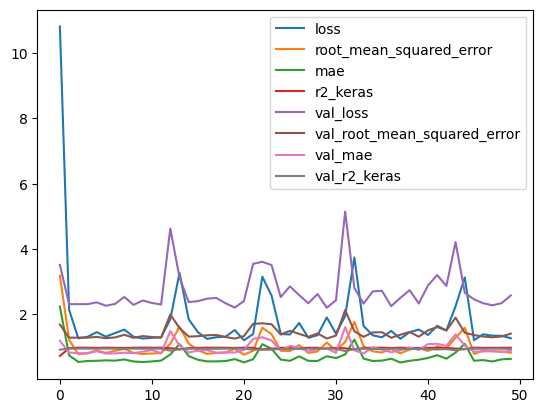

In [248]:
loss1=pd.DataFrame(model.history.history)
loss1.plot()

In [249]:
loss1

,loss,root_mean_squared_error,mae,r2_keras,val_loss,val_root_mean_squared_error,val_mae,val_r2_keras
0,10.814202,3.186438,2.240769,0.729928,3.517911,1.692232,1.194263,0.923811
1,2.146082,1.221532,0.751064,0.967301,2.317416,1.290600,0.833344,0.955685
2,1.271774,0.787725,0.547203,0.984748,2.315643,1.290927,0.816769,0.955662
3,1.316706,0.817316,0.576723,0.983562,2.315890,1.291864,0.806453,0.955598
4,1.459897,0.901828,0.583663,0.979975,2.371366,1.313966,0.878318,0.954066
5,1.323263,0.823883,0.596026,0.983646,2.267759,1.274759,0.804748,0.956766
6,1.432071,0.888474,0.587036,0.980344,2.323614,1.297237,0.809855,0.955228
7,1.537213,0.946837,0.623323,0.975778,2.538253,1.378156,0.829599,0.949468
8,1.319314,0.825067,0.562217,0.982926,2.293714,1.287020,0.817140,0.955930
9,1.262325,0.790843,0.544632,0.985166,2.428857,1.338787,0.860388,0.952314
